In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:

import numpy as np
import pandas as pd
import math 
import matplotlib.pylab as plt
from statsmodels.tsa.arima_process import arma_acf
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels as sm
import statsmodels.api as smapi
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.arima_model import ARIMA

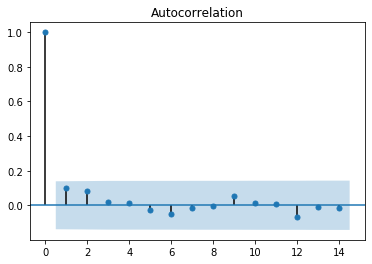

/Users/sergiocalderonv/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


(0, 20)

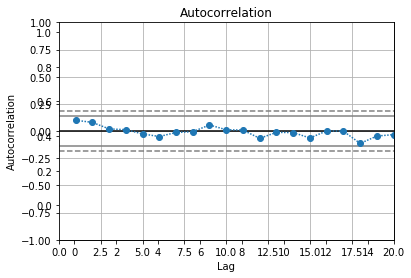

In [10]:
np.random.seed(12345)
y=np.random.normal(0,1,size=200)
plot_acf(y,lags=((len(y))**0.5),unbiased=False)
from pandas.plotting import autocorrelation_plot
ax=autocorrelation_plot(y,marker="o",dashes= (1,0,0,1))
ax.set_xlim([0, 20])
#plt.show()

# Identificación de procesos MA(q)

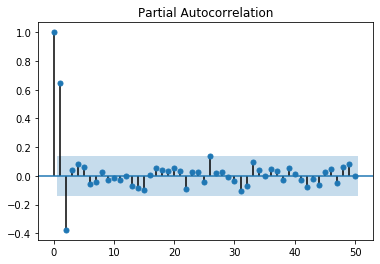

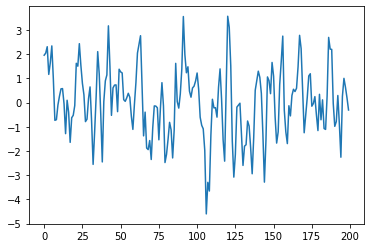

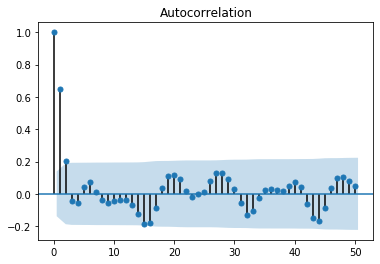

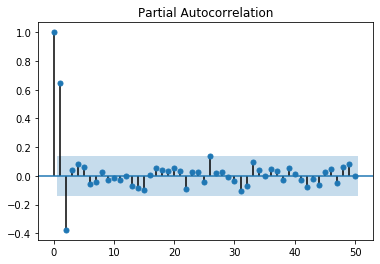

In [12]:
ar=np.array([1]) ####Coeficientes del polinomio autoregresivo.
ma=np.array([1,0.8,0.4])####Coeficientes del polinomio de promedios móviles.

np.random.seed(186)
Tlength=200
sigma=1###Varianza de ruido
simul = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,scale=sigma,distrvs = np.random.normal) 


graficaserie=plt.plot(simul)
#acf(simul,nlags=50,unbiased=False)
graficaacf=plot_acf(simul,lags=50,unbiased=False)
plt.savefig('MAPython.pdf')
plot_pacf(simul,lags=50,method='ldbiased')

In [7]:
help(sm.tsa.arima_process.arma_generate_sample)

Help on function arma_generate_sample in module statsmodels.tsa.arima_process:

arma_generate_sample(ar, ma, nsample, scale=1, distrvs=None, axis=0, burnin=0)
    Simulate data from an ARMA.
    
    Parameters
    ----------
    ar : array_like
        The coefficient for autoregressive lag polynomial, including zero lag.
    ma : array_like
        The coefficient for moving-average lag polynomial, including zero lag.
    nsample : int or tuple of ints
        If nsample is an integer, then this creates a 1d timeseries of
        length size. If nsample is a tuple, creates a len(nsample)
        dimensional time series where time is indexed along the input
        variable ``axis``. All series are unless ``distrvs`` generates
        dependent data.
    scale : float
        The standard deviation of noise.
    distrvs : function, random number generator
        A function that generates the random numbers, and takes sample size
        as argument. The default is np.random.randn.
  

# Identificación de un AR(p)

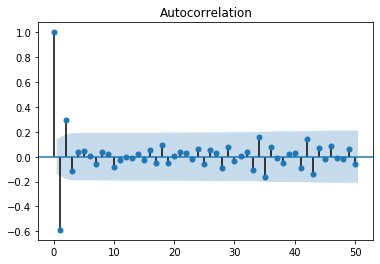

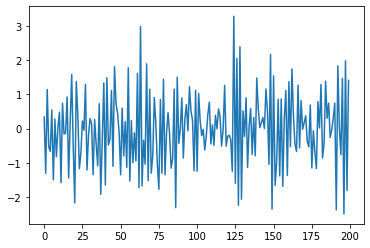

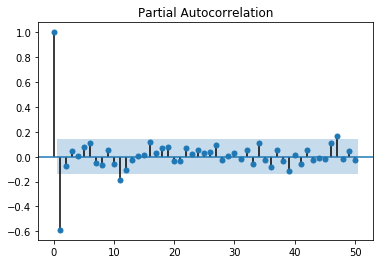

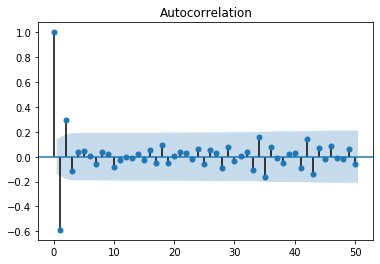

In [11]:
ar=np.array([1,0.7]) ####Coeficientes del polinomio autoregresivo.
ma=np.array([1])

#np.random.seed(2468)
Tlength=200
sigma=1###Varianza de ruido
simular = sm.tsa.arima_process.arma_generate_sample(ar=ar,ma=ma,nsample=Tlength,scale=sigma,distrvs = np.random.normal) 


graficaseriear=plt.plot(simular)
#acf(simul,nlags=50,unbiased=False)
graficapacf=plot_pacf(simular,lags=50,method='ldbiased') ###Se puede usar también em method='ywmle'
plt.savefig('ARPython.pdf')
plot_acf(simular,lags=50,unbiased=False)